In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as pca
from sklearn.preprocessing import MinMaxScaler
import plotly.plotly as py
import plotly.tools as tls
import pandas as pd
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle #for safe the model state

In [0]:
tls.set_credentials_file(username="franklin.sierra", api_key="1dY9fkN76seVSfPFHfJv")

## Conjunto de todas las imagenes promedio

In [4]:
path_classes = "/content/drive/My Drive/Polipos/notebooks/mix_avg_img/"
classes_names = os.listdir(path_classes)
classes_names = np.sort(classes_names)
print (classes_names)
dic_img ={}

for i, name_class in enumerate(classes_names):
    dic_img[classes_names[i]] = np.array(os.listdir(path_classes+classes_names[i]))
    print ("class: ", name_class, "total ", len(dic_img[classes_names[i]]))

['adenomaNbi' 'adenomaWl' 'hyperplasNbi' 'hyperplasWl' 'serratedNbi'
 'serratedWl']
class:  adenomaNbi total  40
class:  adenomaWl total  40
class:  hyperplasNbi total  21
class:  hyperplasWl total  21
class:  serratedNbi total  15
class:  serratedWl total  15


In [5]:
x1 = []
y1 = []
resize_value = 100
for i, classes in enumerate(classes_names):
    print((i+1), "clase: ", classes, " target: ", (i+1), " total: ", len(dic_img[classes]))
    for img_name in dic_img[classes]:
        path_image = path_classes+classes+'/'+img_name
        img = cv.resize(cv.imread(path_image,0),(100,100))*1.
        flatt_img = img.reshape(resize_value*resize_value)
        x1.append(flatt_img)
        y1.append(i+1)
x1 = np.r_[x1]        
y1 = np.r_[y1]

1 clase:  adenomaNbi  target:  1  total:  40
2 clase:  adenomaWl  target:  2  total:  40
3 clase:  hyperplasNbi  target:  3  total:  21
4 clase:  hyperplasWl  target:  4  total:  21
5 clase:  serratedNbi  target:  5  total:  15
6 clase:  serratedWl  target:  6  total:  15


In [6]:
x1.shape

(152, 10000)

In [7]:
x1 = StandardScaler().fit_transform(x1)
x1

array([[-0.25156414, -0.25156414, -0.25156414, ..., -0.2375744 ,
        -0.24064915, -0.24064915],
       [-0.25156414, -0.25156414, -0.25156414, ..., -0.2375744 ,
        -0.24064915, -0.24064915],
       [-0.25156414, -0.25156414, -0.25156414, ..., -0.2375744 ,
        -0.24064915, -0.24064915],
       ...,
       [-0.25156414, -0.25156414, -0.25156414, ..., -0.2375744 ,
        -0.24064915, -0.24064915],
       [-0.25156414, -0.25156414, -0.25156414, ..., -0.2375744 ,
        -0.24064915, -0.24064915],
       [-0.25156414, -0.25156414, -0.25156414, ..., -0.2375744 ,
        -0.24064915, -0.24064915]])

## Conjunto de todas las imagenes varianza

In [8]:
path_classes = "/content/drive/My Drive/Polipos/notebooks/mix_var_img/"
classes_names = os.listdir(path_classes)
classes_names = np.sort(classes_names)
print (classes_names)
dic_img ={}

for i, name_class in enumerate(classes_names):
    dic_img[classes_names[i]] = np.array(os.listdir(path_classes+classes_names[i]))
    print ("class: ", name_class, "total ", len(dic_img[classes_names[i]]))

['adenomaNbi' 'adenomaWl' 'hiperplasNbi' 'hiperplasWl' 'serratedNbi'
 'serratedWl']
class:  adenomaNbi total  40
class:  adenomaWl total  40
class:  hiperplasNbi total  21
class:  hiperplasWl total  21
class:  serratedNbi total  15
class:  serratedWl total  15


In [9]:
x2 = []
y2 = []
resize_value = 100
for i, classes in enumerate(classes_names):
    print((i+1), "clase: ", classes, " target: ", (i+1), " total: ", len(dic_img[classes]))
    for img_name in dic_img[classes]:
        path_image = path_classes+classes+'/'+img_name
        img = cv.resize(cv.imread(path_image,0),(100,100))*1.
        flatt_img = img.reshape(resize_value*resize_value)
        x2.append(flatt_img)
        y2.append(i+1)
x2 = np.r_[x2]        
y2 = np.r_[y2]

1 clase:  adenomaNbi  target:  1  total:  40
2 clase:  adenomaWl  target:  2  total:  40
3 clase:  hiperplasNbi  target:  3  total:  21
4 clase:  hiperplasWl  target:  4  total:  21
5 clase:  serratedNbi  target:  5  total:  15
6 clase:  serratedWl  target:  6  total:  15


In [10]:
x2.shape

(152, 10000)

In [0]:
x2 = StandardScaler().fit_transform(x2)

## Conjunto de todas las imagenes derivadas

In [12]:
path_classes = "/content/drive/My Drive/Polipos/notebooks/mix_der_img/"
classes_names = os.listdir(path_classes)
classes_names = np.sort(classes_names)
print (classes_names)
dic_img ={}

for i, name_class in enumerate(classes_names):
    dic_img[classes_names[i]] = np.array(os.listdir(path_classes+classes_names[i]))
    print ("class: ", name_class, "total ", len(dic_img[classes_names[i]]))

['adenomaNbi' 'adenomaWl' 'hiperplasNbi' 'hiperplasWl' 'serratedNbi'
 'serratedWl']
class:  adenomaNbi total  40
class:  adenomaWl total  40
class:  hiperplasNbi total  21
class:  hiperplasWl total  21
class:  serratedNbi total  15
class:  serratedWl total  15


In [13]:
x3 = []
y3 = []
resize_value = 100
for i, classes in enumerate(classes_names):
    print((i+1), "clase: ", classes, " target: ", (i+1), " total: ", len(dic_img[classes]))
    for img_name in dic_img[classes]:
        path_image = path_classes+classes+'/'+img_name
        img = cv.resize(cv.imread(path_image,0),(100,100))*1.
        flatt_img = img.reshape(resize_value*resize_value)
        x3.append(flatt_img)
        y3.append(i+1)
x3 = np.r_[x3]        
y3 = np.r_[y3]

1 clase:  adenomaNbi  target:  1  total:  40
2 clase:  adenomaWl  target:  2  total:  40
3 clase:  hiperplasNbi  target:  3  total:  21
4 clase:  hiperplasWl  target:  4  total:  21
5 clase:  serratedNbi  target:  5  total:  15
6 clase:  serratedWl  target:  6  total:  15


In [0]:
x3 = StandardScaler().fit_transform(x3)

# Juntando todo

Analisis del discriminante lineal

Estandarizar los datos

* Obtener los valores y vectores propios de la matriz de covarianza o de correlaciones o la tecnica del singular vector descompostion.
* Ordenar los valores propios de manera descente y quedar con los p mayores para disminuir el numero de variables
* Constriuir la matriz de proyeccion W a partir de los p valores propios







In [0]:
img_mix = np.concatenate((x1, x2, x3), axis = 1)

In [16]:
img_mix.shape

(152, 30000)

##Calculo la descomposición de los valores y vectores propios

**Valores propios:**  Determinan la magnitud (varianza de datos)

**Vectores propios:** Determinan las direcciones en el nuevo espacio vectorial

####Usando la matriz de covarianza

In [0]:
mat_cov = np.cov(img_mix)

In [18]:
eig_vals, eig_vectors = np.linalg.eig(mat_cov)
print("Valores propios \n%s" %eig_vals)
print("Vectores propios \n%s" %eig_vectors)

Valores propios 
[ 1.43658652e+01  1.08025067e+01  8.98856274e+00  7.96396226e+00
  7.33549634e+00  6.29968165e+00  5.83282233e+00  4.65495399e+00
  3.92058112e+00  3.19942862e+00  3.03826379e+00  2.84101900e+00
  2.58389178e+00  2.22344229e+00  2.09788789e+00  1.99647795e+00
  1.65676574e+00  1.58466967e+00  1.50304848e+00  1.30028264e+00
  1.22521499e+00  1.18660918e+00  1.14344888e+00  1.09414847e+00
  1.03903905e+00  1.00446468e+00  9.96833021e-01  9.80837935e-01
  9.25241384e-01 -6.27841050e-16  8.63892324e-01  8.39237865e-01
  8.19808658e-01  7.88712099e-01  7.37778871e-01  7.11252861e-01
  6.37837300e-01  6.70344034e-01  6.61162683e-01  6.18802818e-01
  6.02030050e-01  5.92732018e-01  5.83155151e-01  5.76747240e-01
  5.54104606e-01  5.43937335e-01  5.31670041e-01  5.02149789e-01
  4.99200843e-01  4.82637500e-01  4.62791911e-01  4.42351999e-01
  4.30988195e-01  4.18856428e-01  4.14920569e-01  4.03078569e-01
  3.95131806e-01  3.83790089e-01  3.73539411e-01  3.69073838e-01
  3.5449

####Usando la matriz de correlaciones

Normalizacion de la matriz de covarianza.

In [19]:
mat_corr = np.corrcoef(img_mix)
mat_corr

array([[ 1.        , -0.03685427,  0.20939633, ..., -0.0094691 ,
         0.0539541 ,  0.33151377],
       [-0.03685427,  1.        ,  0.49700354, ..., -0.05900887,
        -0.11251807, -0.30359548],
       [ 0.20939633,  0.49700354,  1.        , ...,  0.13416782,
        -0.03188541, -0.0887565 ],
       ...,
       [-0.0094691 , -0.05900887,  0.13416782, ...,  1.        ,
        -0.02853657,  0.23324024],
       [ 0.0539541 , -0.11251807, -0.03188541, ..., -0.02853657,
         1.        , -0.04469954],
       [ 0.33151377, -0.30359548, -0.0887565 , ...,  0.23324024,
        -0.04469954,  1.        ]])

In [0]:
eig_vals, eig_vectors = np.linalg.eig(mat_corr)

##Las componenetes principales

In [0]:
scaler = MinMaxScaler(feature_range=[0,1])

In [0]:
data_rescaled = scaler.fit_transform(img_mix)

In [0]:
from sklearn.decomposition import PCA as pca
pca = pca().fit(data_rescaled)

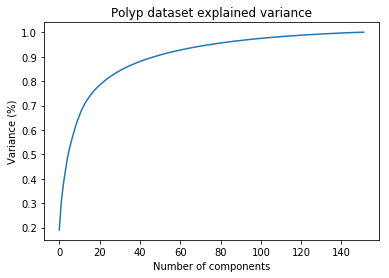

In [24]:
#dibujo la suma de la varianza acumulativa
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance (%)') #for each component
plt.title('Polyp dataset explained variance')
plt.show()

### Otro enfoque

In [0]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vectors[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

In [26]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
cont = 0
print('Eigenvalues in descending order:')
for i in eig_pairs:
    cont = cont+1
    print(i[0])
print("cantidad total de pares: ", cont)

Eigenvalues in descending order:
16.290282195664307
12.526871115544854
10.099239167375725
7.931780472638196
7.3803195223437195
6.449904802360766
5.324273592424982
4.8908305152573375
4.082947468664479
3.436136958212218
3.173694803428188
2.75828811547436
2.5049022288674863
2.2812176855925324
2.108309357227506
2.0160590731762893
1.8121659102473942
1.7004544357327456
1.5887934017450758
1.475260064851432
1.4020083388785083
1.3821508052948521
1.3158687642482345
1.2657633586037496
1.1809096808685655
1.150546676065909
1.0837363302422747
1.0626416613804015
1.0244368911503696
0.976431089991987
0.9460737315282222
0.9139955679874239
0.868374587204791
0.85460346738952
0.8154512377588826
0.7818809308633939
0.7499744375897157
0.732203354316195
0.7054867194092136
0.6852117580910418
0.6742307553964679
0.6695778916128915
0.6539989177093773
0.6364052034750076
0.6336337296553891
0.5954839257476344
0.5917305164052804
0.5823242510945948
0.5731645529848476
0.5500006577277772
0.5364499219494752
0.531572086813

In [27]:
len(eig_pairs)

152

In [0]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [29]:
trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,len(img_mix))],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,len(img_mix))], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='selecting-principal-components')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~franklin.sierra/0 or inside your plot.ly account where it is named 'selecting-principal-components'


In [43]:
acp = pca(n_components = 83)#con 83 componentes se logran describir el 92% de los datos
img_mix = acp.fit_transform(img_mix)
img_mix

array([[ 2.38676147e+00,  6.25093370e+01,  1.41124898e+01, ...,
        -5.64816205e+00,  1.39866344e+00, -9.34868859e+00],
       [ 5.74148672e+00, -5.62963579e+01, -3.33454504e+01, ...,
        -4.25991930e-01,  2.07126083e+00, -4.32885880e-01],
       [ 1.16600185e+01, -4.00243461e+01, -3.02644356e+01, ...,
        -1.18152805e+01, -1.72904423e+00, -1.72322955e+00],
       ...,
       [-2.78821522e+01, -1.94518096e+01, -5.00919003e+00, ...,
        -2.16203247e+00,  1.06088798e+01,  1.34624992e+01],
       [ 1.31960536e+02, -2.90369197e+01,  2.71153628e+01, ...,
         5.41959878e-01, -1.87344292e+00, -1.01675763e+00],
       [-3.70049186e+01,  8.18767943e+01,  3.67825206e+01, ...,
        -1.70925245e+00, -3.65977829e+00, -8.54024229e-02]])

In [44]:
img_mix.shape

(152, 83)

**USANDO SVM**

In [0]:
from sklearn.utils import shuffle

In [133]:
#particion train and test
from sklearn.model_selection import train_test_split
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(img_mix,y1,test_size=test_size)
print (y_test)

[6 5 3 2 1 2 3 3 3 5 4 2 1 1 2 5 5 1 3 2 1 1 5 1 1 4 2 4 1 5 5]


In [134]:
print("x_train:", len(x_train))
print("x_test:", len(x_test))
print("y_train:", len(y_train))
print("x_test:", len(y_test))

x_train: 121
x_test: 31
y_train: 121
x_test: 31


In [0]:
svm1 = svm.SVC(kernel='linear', C=1.0)

In [52]:
svm1.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
cv1 = KFold(n_splits = img_mix.shape[0], shuffle = True, random_state = 1)

In [61]:
acc1 = np.mean(cross_val_score(svm1, img_mix, y1, scoring = "accuracy", cv = cv1, n_jobs=1))
acc1

0.3092105263157895

**RANDOM FOREST**

In [0]:
from sklearn.ensemble import RandomForestClassifier 
#num_trees = 100

In [108]:
acc = -999
depth = 0
for i in range(10, 100, 10):
  forest1 = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators= i)
  forest1.fit(x_train, y_train)
  score = forest1.score(x_test, y_test)
  print("score para profundidad: ", i, "fue de: ",score)
  if (score > acc):
    acc = score
    depth = i
    #salving the model
    filename1 = 'randomForest.sav'
    pickle.dump(forest1, open(filename1, 'wb'))

print("la mejor profundidad: ", depth)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:460: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:465: RuntimeWarning:

invalid value encountered in true_divide



score para profundidad:  10 fue de:  0.22580645161290322
score para profundidad:  20 fue de:  0.41935483870967744
score para profundidad:  30 fue de:  0.22580645161290322
score para profundidad:  40 fue de:  0.1935483870967742
score para profundidad:  50 fue de:  0.3225806451612903
score para profundidad:  60 fue de:  0.16129032258064516
score para profundidad:  70 fue de:  0.2903225806451613
score para profundidad:  80 fue de:  0.2903225806451613
score para profundidad:  90 fue de:  0.2903225806451613
la mejor profundidad:  20


In [120]:
# some time later...
 
# load the model from disk
forest1 = pickle.load(open(filename1, 'rb'))
acc = forest1.score(x_test, y_test)
print(acc)

0.41935483870967744


**¿Por que no funciona el LOOCV?**

In [0]:
cv2 = KFold(n_splits = img_mix.shape[0], shuffle = True, random_state = 1)

In [122]:
acc2 = np.mean(cross_val_score(forest1, img_mix, y1, scoring = "accuracy", cv = cv2, n_jobs=1))
acc2

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:460: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:465: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:460: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:465: RuntimeWarning:

invalid value encountered in true_divide



KeyboardInterrupt: ignored

# Pca para los datos de manera separada

**Para las imagenes promedio**

In [0]:
scaler = MinMaxScaler(feature_range=[0,1])

In [0]:
data_rescaled = scaler.fit_transform(x1)

In [0]:
from sklearn.decomposition import PCA as pca
pca = pca().fit(data_rescaled)

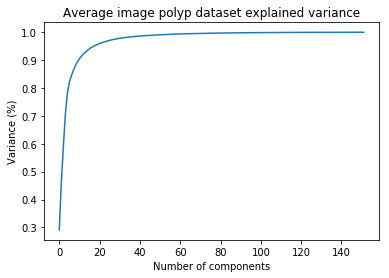

In [128]:
#dibujo la suma de la varianza acumulativa
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance (%)') #for each component
plt.title('Average image polyp dataset explained variance')
plt.show()

In [0]:
acp2 = pca(n_components = 30)
img_avg = acp2.fit_transform(x1)

In [132]:
img_avg.shape

(152, 30)

**SVM**

In [135]:
#particion train and test
from sklearn.model_selection import train_test_split
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(img_avg,y1,test_size=test_size)
print (y_test)

[3 5 2 2 3 5 2 6 6 1 1 4 1 1 4 4 1 1 1 1 3 6 2 5 3 3 2 5 1 1 3]


In [0]:
svm2 = svm.SVC(kernel='linear', C=1.0)

In [137]:
svm2.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
cv3 = KFold(n_splits = img_avg.shape[0], shuffle = True, random_state = 1)

In [140]:
acc2 = np.mean(cross_val_score(svm2, img_avg, y1, scoring = "accuracy", cv = cv3, n_jobs=1))
acc2

0.23684210526315788

**Random Forest**

In [146]:
acc = -999
depth = 0
for i in range(10, 100, 10):
  forest2 = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators= i)
  forest2.fit(x_train, y_train)
  score = forest2.score(x_test, y_test)
  print("score para profundidad: ", i, "fue de: ",score)
  if (score > acc):
    acc = score
    depth = i
    #salving the model
    filename2 = 'randomForestAvg_img.sav'
    pickle.dump(forest1, open(filename2, 'wb'))

print("la mejor profundidad: ", depth)

score para profundidad:  10 fue de:  0.1935483870967742
score para profundidad:  20 fue de:  0.25806451612903225
score para profundidad:  30 fue de:  0.22580645161290322
score para profundidad:  40 fue de:  0.1935483870967742
score para profundidad:  50 fue de:  0.12903225806451613
score para profundidad:  60 fue de:  0.16129032258064516
score para profundidad:  70 fue de:  0.0967741935483871
score para profundidad:  80 fue de:  0.0967741935483871
score para profundidad:  90 fue de:  0.22580645161290322
la mejor profundidad:  20


**Para imagenes de varianza**

In [0]:
scaler = MinMaxScaler(feature_range=[0,1])

In [0]:
data_rescaled = scaler.fit_transform(x2)

In [0]:
pca = pca().fit(data_rescaled)

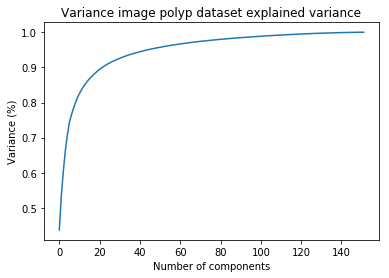

In [151]:
#dibujo la suma de la varianza acumulativa
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance (%)') #for each component
plt.title('Variance image polyp dataset explained variance')
plt.show()

In [0]:
from sklearn.decomposition import PCA as pca
acp3 = pca(n_components = 60)
img_var = acp3.fit_transform(x2)

In [155]:
img_var.shape

(152, 60)

**SVM**

In [156]:
#particion train and test
from sklearn.model_selection import train_test_split
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(img_var,y2,test_size=test_size)
print (y_test)

[2 6 5 1 3 6 5 1 1 2 1 1 6 3 1 1 4 1 2 4 5 2 2 3 1 4 6 1 2 3 5]


In [0]:
svm3 = svm.SVC(kernel='linear', C=1.0)

In [158]:
svm3.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
cv = KFold(n_splits = img_var.shape[0], shuffle = True, random_state = 1)

In [160]:
acc3 = np.mean(cross_val_score(svm3, img_var, y2, scoring = "accuracy", cv = cv, n_jobs=1))
acc3

0.3092105263157895

**Radom Forest**

In [165]:
acc = -999
depth = 0
for i in range(10, 100, 10):
  forest3 = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators= i)
  forest3.fit(x_train, y_train)
  score = forest3.score(x_test, y_test)
  print("score para profundidad: ", i, "fue de: ",score)
  if (score > acc):
    acc = score
    depth = i
    #salving the model
    filename3 = 'randomForestVar_img.sav'
    pickle.dump(forest3, open(filename3, 'wb'))

print("la mejor profundidad: ", depth)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:460: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:465: RuntimeWarning:

invalid value encountered in true_divide



score para profundidad:  10 fue de:  0.3225806451612903
score para profundidad:  20 fue de:  0.0967741935483871
score para profundidad:  30 fue de:  0.22580645161290322
score para profundidad:  40 fue de:  0.1935483870967742
score para profundidad:  50 fue de:  0.16129032258064516
score para profundidad:  60 fue de:  0.3225806451612903
score para profundidad:  70 fue de:  0.3225806451612903
score para profundidad:  80 fue de:  0.22580645161290322
score para profundidad:  90 fue de:  0.2903225806451613
la mejor profundidad:  10


**Para imágenes de derivada**

In [0]:
scaler = MinMaxScaler(feature_range=[0,1])

In [0]:
data_rescaled = scaler.fit_transform(x3)

In [0]:
pca = pca().fit(data_rescaled)

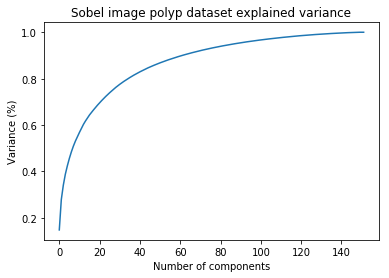

In [169]:
#dibujo la suma de la varianza acumulativa
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance (%)') #for each component
plt.title('Sobel image polyp dataset explained variance')
plt.show()

In [0]:
from sklearn.decomposition import PCA as pca
acp3 = pca(n_components = 80)
img_der = acp3.fit_transform(x3)

In [172]:
img_der.shape

(152, 80)

**SVM**

In [173]:
#particion train and test
from sklearn.model_selection import train_test_split
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(img_der,y3,test_size=test_size)
print (y_test)

[2 2 3 6 1 3 2 2 6 2 1 3 6 2 2 1 3 5 4 2 1 3 6 3 5 1 2 4 1 4 1]


In [0]:
svm4 = svm.SVC(kernel='linear', C=1.0)

In [175]:
svm4.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
cv = KFold(n_splits = img_der.shape[0], shuffle = True, random_state = 1)

In [177]:
acc4 = np.mean(cross_val_score(svm4, img_der, y3, scoring = "accuracy", cv = cv, n_jobs=1))
acc4

0.34210526315789475

**Random Forest**

In [182]:
acc = -999
depth = 0
for i in range(10, 100, 10):
  forest3 = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators= i)
  forest3.fit(x_train, y_train)
  score = forest3.score(x_test, y_test)
  print("score para profundidad: ", i, "fue de: ",score)
  if (score > acc):
    acc = score
    depth = i
    #salving the model
    filename4 = 'randomForestDer_img.sav'
    pickle.dump(forest3, open(filename4, 'wb'))

print("la mejor profundidad: ", depth)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:460: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:465: RuntimeWarning:

invalid value encountered in true_divide



score para profundidad:  10 fue de:  0.1935483870967742
score para profundidad:  20 fue de:  0.22580645161290322
score para profundidad:  30 fue de:  0.16129032258064516
score para profundidad:  40 fue de:  0.22580645161290322
score para profundidad:  50 fue de:  0.16129032258064516
score para profundidad:  60 fue de:  0.3225806451612903
score para profundidad:  70 fue de:  0.22580645161290322
score para profundidad:  80 fue de:  0.1935483870967742
score para profundidad:  90 fue de:  0.16129032258064516
la mejor profundidad:  60
